default
_0
_1
_2
_3


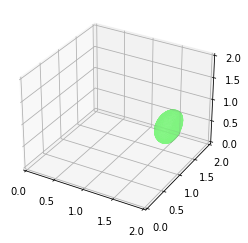

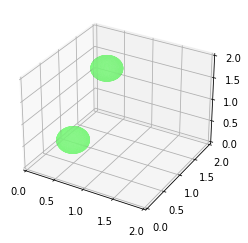

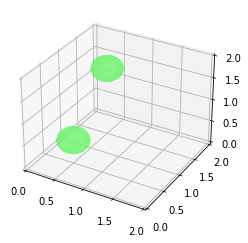

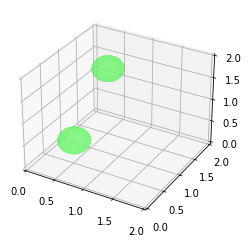

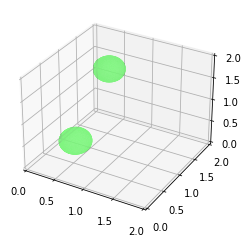

In [27]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import os
import re

for file in os.listdir('.'):
    if file.endswith('-connectivity.dat'):
        prefix = re.sub('-connectivity.dat', '', file);
        print( prefix);	
        file1 = prefix+"-coordinates.dat"
        file2 = file
        imgfile = prefix+".png"
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        #Reading Coordinates
        dat = np.loadtxt(file1);
        xyz = np.reshape(dat,(-1,3));
        xyzt = np.transpose(xyz)
        #Reading connectivity of corners of triangles
        dat = np.loadtxt(file2, dtype = 'int')
        vertices = np.reshape(dat,(-1,3));
        x = xyzt[0];
        y = xyzt[1];
        z = xyzt[2];
        poly3d = [[xyz[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
        collection = Poly3DCollection(poly3d, linewidths=0.5, alpha=0.9)
        face_color = [0.5, 1.0, 0.5] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
        collection.set_facecolor(face_color)
        ax.add_collection3d(collection)
        ax.set_xlim([0, 2])
        ax.set_ylim([0, 2])
        ax.set_zlim([0, 2])
        plt.savefig(imgfile)